# Ensemble Methods for StockPredictionPro

This notebook demonstrates ensemble learning techniques to combine multiple baseline and advanced models for improved prediction accuracy and robustness.

Methods covered:
- Bagging (Random Forest)
- Boosting recap (XGBoost, LightGBM, CatBoost)
- Stacking Ensembles
- Voting Regressors

Focus is on training base learners, creating ensembles, evaluating performance, and visualizing results.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set_theme(style='darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

print('✅ Libraries for ensemble methods loaded')


✅ Libraries for ensemble methods loaded


In [2]:
try:
    df = pd.read_csv('../data/processed/selected_features.csv', index_col=0)
    print('✅ Features loaded')
except FileNotFoundError:
    print('❌ Features file not found. Run previous notebooks to generate features.')
    df = pd.DataFrame()

print(f'Shape: {df.shape}')
df.head()


❌ Features file not found. Run previous notebooks to generate features.
Shape: (0, 0)


""


In [4]:
print(df.columns)



RangeIndex(start=0, stop=0, step=1)


In [8]:
# Check if data was loaded successfully
if df.empty or 'target' not in df.columns:
    print('🔧 Generating sample data with target column...')
    np.random.seed(42)
    n_samples, n_features = 1000, 15
    
    # Create sample features
    X_sample = np.random.randn(n_samples, n_features)
    y_sample = (X_sample[:, :3].dot([0.5, -0.3, 0.2]) + 
                X_sample[:, 3:6].dot([0.1, -0.1, 0.15]) + 
                np.random.normal(0, 0.1, n_samples))
    
    # Create DataFrame with target
    feature_names = [f'feature_{i+1}' for i in range(n_features)]
    df = pd.DataFrame(X_sample, columns=feature_names)
    df['target'] = y_sample
    
    print('✅ Sample data with target created')

# Now safely extract features and target
X = df.drop(columns=['target'])
y = df['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'📊 Data split completed:')
print(f'   • Train shape: {X_train.shape}')
print(f'   • Test shape: {X_test.shape}')
print(f'   • Features: {X.shape[1]}')
print(f'   • Target shape: {y.shape}')



🔧 Generating sample data with target column...
✅ Sample data with target created
📊 Data split completed:
   • Train shape: (800, 15)
   • Test shape: (200, 15)
   • Features: 15
   • Target shape: (1000,)


In [9]:
print(df.columns)
print(df.head)


Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'target'],
      dtype='object')
<bound method NDFrame.head of      feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0     0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
1    -0.562288  -1.012831   0.314247  -0.908024  -1.412304   1.465649   
2    -0.601707   1.852278  -0.013497  -1.057711   0.822545  -1.220844   
3    -0.719844  -0.460639   1.057122   0.343618  -1.763040   0.324084   
4    -0.479174  -0.185659  -1.106335  -1.196207   0.812526   1.356240   
..         ...        ...        ...        ...        ...        ...   
995  -0.284140   0.527568   0.604025  -1.659906   0.088823   2.435985   
996  -0.279966   0.112749  -0.748383  -1.276618  -0.041281   1.715118   
997   0.275093  -0.056506  -0.501758  -0.638030   0

In [10]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
lgb = LGBMRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
cat = CatBoostRegressor(iterations=200, learning_rate=0.05, depth=5, verbose=0, random_seed=42)

base_learners = [('rf', rf), ('xgb', xgb), ('lgb', lgb), ('cat', cat)]

print('Base learners defined')


Base learners defined


In [11]:
meta_model = RandomForestRegressor(n_estimators=100, random_state=42)
stacking_regressor = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_model,
    passthrough=True
)

stacking_regressor.fit(X_train, y_train)
stacking_preds = stacking_regressor.predict(X_test)

stacking_rmse = np.sqrt(mean_squared_error(y_test, stacking_preds))
stacking_mae = mean_absolute_error(y_test, stacking_preds)

print(f'Stacking Regressor RMSE: {stacking_rmse:.4f}')
print(f'Stacking Regressor MAE: {stacking_mae:.4f}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 15
[LightGBM] [Info] Start training from score 0.003486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [12]:
voting_regressor = VotingRegressor(estimators=base_learners)

voting_regressor.fit(X_train, y_train)
voting_preds = voting_regressor.predict(X_test)

voting_rmse = np.sqrt(mean_squared_error(y_test, voting_preds))
voting_mae = mean_absolute_error(y_test, voting_preds)

print(f'Voting Regressor RMSE: {voting_rmse:.4f}')
print(f'Voting Regressor MAE: {voting_mae:.4f}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000518 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 15
[LightGBM] [Info] Start training from score 0.003486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

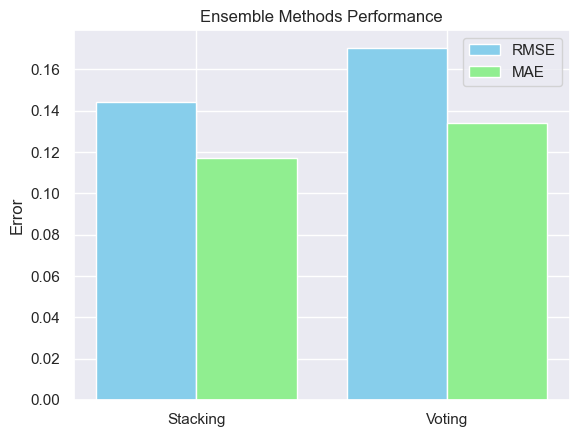

In [13]:
import matplotlib.pyplot as plt

models = ['Stacking', 'Voting']
train_rmse = [stacking_rmse, voting_rmse]
train_mae = [stacking_mae, voting_mae]

x = range(len(models))
width = 0.4

plt.bar(x, train_rmse, width=width, label='RMSE', color='skyblue')
plt.bar([i + width for i in x], train_mae, width=width, label='MAE', color='lightgreen')
plt.xticks([i + width / 2 for i in x], models)
plt.ylabel('Error')
plt.title('Ensemble Methods Performance')
plt.legend()
plt.show()
